# Project using Logistic Regression to predict whether it will rain or not

# Importing the important libraries

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Downloading the data

In [3]:
rain_df = pd.read_csv("../RainTomorrow/weatherAUS.csv")
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
rain_df.shape

(145460, 23)

The dataset contains 145460 rows and 23 columns. It has data, categorical and numeric columns. We want to create a model to predict the value in the column RainTomorrow.
Let's check the info about all the columns.

In [5]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

We discard the rows where the value of RainTomorrow or RainToday is missing to make our analysis and modeling simplier.

In [6]:
rain_df.dropna(subset=["RainToday", "RainTomorrow"], inplace=True)

# Exploratory Data Analysis and Visualization


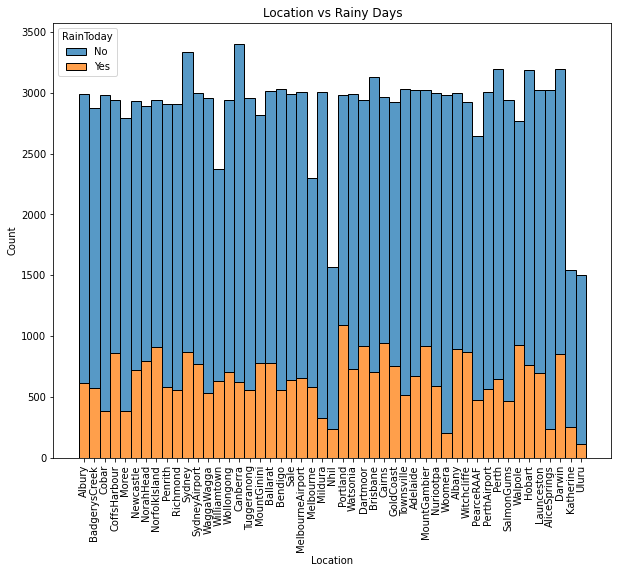

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(data = rain_df, x = "Location", hue = "RainToday", multiple="stack")
plt.xticks(rotation = 90)
plt.title("Location vs Rainy Days")
plt.show()

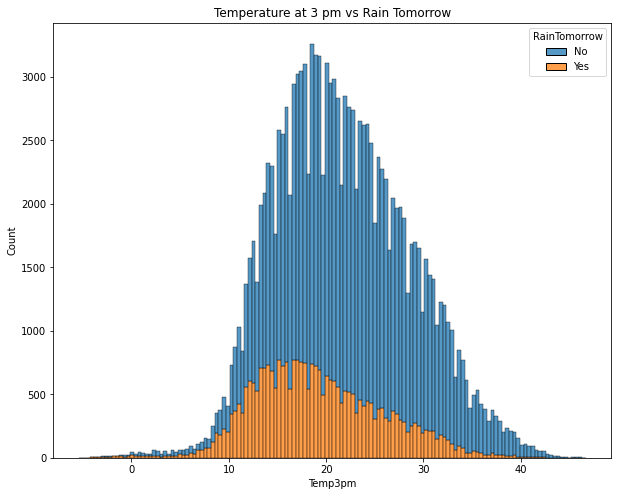

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(data = rain_df, x = "Temp3pm", hue = "RainTomorrow", multiple="stack")
plt.title("Temperature at 3 pm vs Rain Tomorrow")
plt.show()

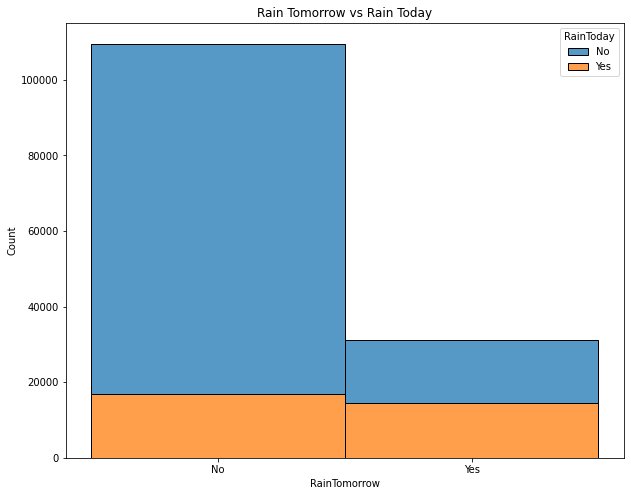

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(data = rain_df, x = "RainTomorrow", hue = "RainToday", multiple="stack")
plt.title("Rain Tomorrow vs Rain Today")
plt.show()

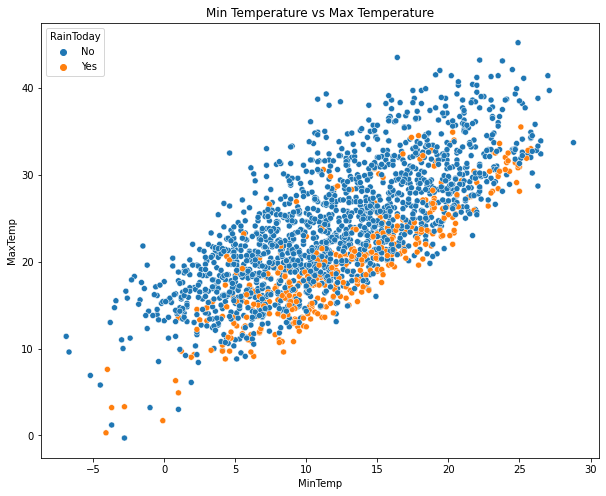

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(rain_df.sample(2000), x = "MinTemp", y = "MaxTemp", hue = "RainToday")
plt.title("Min Temperature vs Max Temperature")
plt.show()

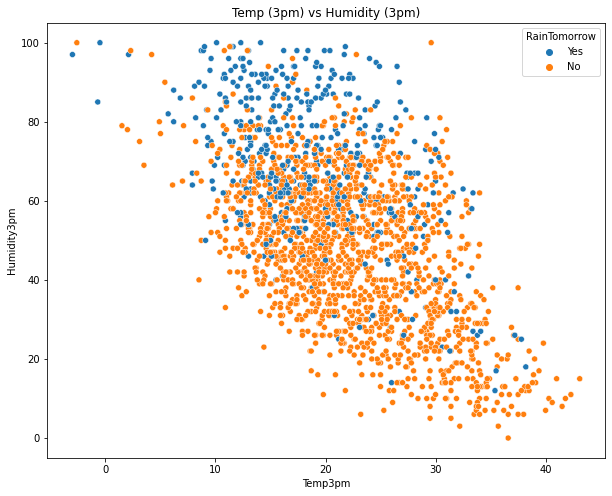

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(rain_df.sample(2000), x = "Temp3pm", y = "Humidity3pm", hue = "RainTomorrow")
plt.title("Temp (3pm) vs Humidity (3pm)")
plt.show()